In [2]:
import choix
import networkx as nx
import numpy as np

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

from sqlalchemy import create_engine
from sqlalchemy.orm import scoped_session, sessionmaker
from sqlalchemy import func
from app.db import Base, User, Annotation, Crop, Page, Record, Set, RecordCrop

if __name__ == "__main__":
    engine = create_engine('sqlite:///database.sqlite3',
                           convert_unicode=True,
                           connect_args={'check_same_thread': False})
    db_session = scoped_session(sessionmaker(autocommit=False,
                                             autoflush=False,
                                             bind=engine))
    Base.query = db_session.query_property()
    Base.metadata.create_all(bind=engine)

    records_set_1 = Record.query.filter(Record.set_id == 1).all()
    records_set_3 = Record.query.filter(Record.set_id == 3).all()
    records_set_5 = Record.query.filter(Record.set_id == 5).all()
    
    records = records_set_1 + records_set_3 + records_set_5
    
    not_empty = []
    for i, item in enumerate(records):
        if len(item.annotations) > 0:
            not_empty.append(item)

    print(len(records), len(not_empty))

    prep_data = []
    set_ = set()
    for i, item in enumerate(not_empty):
        record_crop = RecordCrop.query.filter(RecordCrop.record_id == item.id).order_by(RecordCrop.order).all()
        _01 = 0
        _10 = 0
        for e, elem in enumerate(item.annotations):
            if elem.annotation == "01":
                _01 += 1
            else:
                _10 += 1
        if _01 > _10:
            prep_data.append([record_crop[0].crop_id, record_crop[1].crop_id])
            set_.add(record_crop[0].crop_id)
            set_.add(record_crop[1].crop_id)
        elif _01 < _10:
            prep_data.append([record_crop[1].crop_id, record_crop[0].crop_id])
            set_.add(record_crop[0].crop_id)
            set_.add(record_crop[1].crop_id)
    
    n_items = len(set_)
    set_ = sorted(list(set_))
    mapping = dict()
    for i in range(len(set_)):
        mapping[i] = set_[0]
        for e, elem in enumerate(prep_data):
            if elem[0] == set_[0]:
                elem[0] = i
            if elem[1] == set_[0]:
                elem[1] = i
        set_ = set_[1:]
    
    data = []
    
    for i, item in enumerate(prep_data):
        data.append((item[0], item[1]))

2800 2406


In [3]:
params = choix.ilsr_pairwise(n_items, data, 0.0001, max_iter=1000)
print(params)

[-0.839  1.089  0.525 ...,  0.681 -0.006  1.569]


In [4]:
hundred = []
for i, item in enumerate(np.argsort(params)):
    if i % 100 == 0:
        hundred.append(mapping[item])
    
    #print(mapping[item])
print(hundred)

[1616, 635, 214, 582, 207, 1579, 1037, 929, 11, 1668, 619, 1238, 980, 1733, 1226, 1067, 114, 1106]


In [5]:
min_, max_ = min(params), max(params)
print(min_, max_)
for i, val in enumerate(params):
    params[i] = (val-min_) / (max_-min_)
    
print(params)

-6.12846700908 2.69814231776
[ 0.599  0.818  0.754 ...,  0.771  0.694  0.872]


In [6]:
for i, item in enumerate(np.argsort(params)):
    print(mapping[item], params[item])

1616 0.0
668 0.05973124534
1804 0.0667565586995
454 0.0741347675128
1808 0.139073149308
766 0.151305327806
399 0.160855516205
712 0.179805358513
1790 0.190132943955
1803 0.198832583236
511 0.200837660693
500 0.201810172036
492 0.205647547147
675 0.211814913974
1385 0.216814132057
1086 0.219028945051
1611 0.22098032941
456 0.221144761041
1506 0.224723396093
504 0.230117639028
1618 0.231857949427
495 0.243864802574
1081 0.246146170402
1096 0.246375748501
1601 0.246867325023
382 0.256982668511
1379 0.257702217199
25 0.258047196263
1394 0.261866272525
415 0.263982094797
1756 0.2663068586
275 0.269021898327
218 0.270027355284
625 0.270470530816
1740 0.274279065947
44 0.281486926012
1761 0.283280735361
664 0.284324990403
1011 0.285258400726
1836 0.292215667451
458 0.292681966157
385 0.293312389165
1353 0.294602976386
676 0.296976117345
413 0.298915823971
1400 0.299949327766
626 0.301150672144
1781 0.30423692983
587 0.312113254678
1488 0.312580593428
499 0.31480850518
1642 0.316227734324
1084

1861 0.584865463473
446 0.585143390435
1261 0.585177740818
1862 0.585405393178
584 0.585647140185
517 0.585998296555
1393 0.586214775692
1083 0.586214775692
572 0.586371321189
1519 0.586495672962
102 0.586505733401
738 0.586624231945
1775 0.586642251543
865 0.587408755131
1872 0.587459156872
1776 0.587459156872
1950 0.587544320529
537 0.588000078019
1726 0.588687635638
1604 0.588723021731
52 0.588945480864
1662 0.58942692095
1916 0.590323027293
239 0.592564994843
1746 0.593271927011
1965 0.594015650604
1401 0.59416384559
800 0.594511389644
71 0.594673499628
1579 0.595158270502
1670 0.595446247304
886 0.596025032859
1507 0.597466922736
802 0.597472696386
1100 0.597696414474
1978 0.597962278196
971 0.598378323228
1690 0.599132529443
1 0.599239581661
457 0.599594497851
513 0.600360616094
485 0.600385413612
1963 0.600545702781
1797 0.601336326569
1807 0.602853673783
1312 0.603455364667
1313 0.604946538373
1405 0.605100546016
725 0.606173117001
1335 0.607767664694
1700 0.608398260416
596 0.

166 0.786672945173
1750 0.787176323621
1447 0.787622841113
331 0.788203993241
799 0.788308909989
417 0.78915648493
806 0.791549675503
88 0.791618663607
1128 0.792692186968
1523 0.792810255582
352 0.792945010859
151 0.793197892698
1403 0.79332616466
775 0.79373477126
694 0.794544372428
1290 0.794731386336
469 0.795186875724
1924 0.795638433656
904 0.796189179093
1433 0.796248391663
1209 0.796257686811
1932 0.796680636111
960 0.796737072953
1057 0.796752330349
1826 0.796923915103
205 0.796952193218
1203 0.797447534751
92 0.797630912874
1698 0.798022388001
1546 0.798066922963
208 0.798088407493
948 0.798121318473
618 0.798224153844
1162 0.798866200058
926 0.798866200058
1709 0.799190405775
196 0.799202214444
433 0.799653751422
18 0.800021943342
791 0.800171156517
1897 0.800171156517
335 0.800540141523
620 0.800656223157
839 0.800686870494
1424 0.800690936437
1502 0.80073814281
358 0.800944805369
1533 0.801036576647
566 0.802081752803
361 0.802417853771
1813 0.802753937796
1238 0.803016277

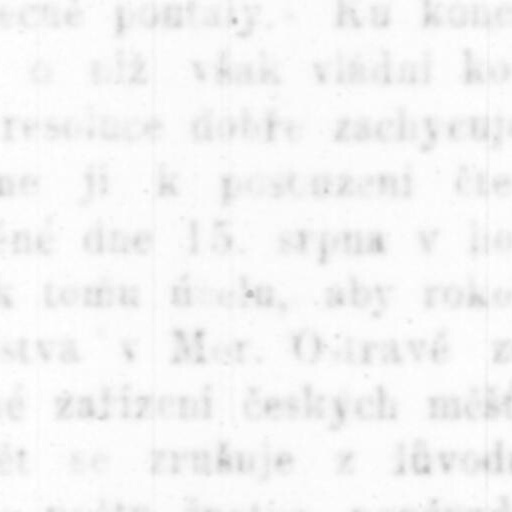

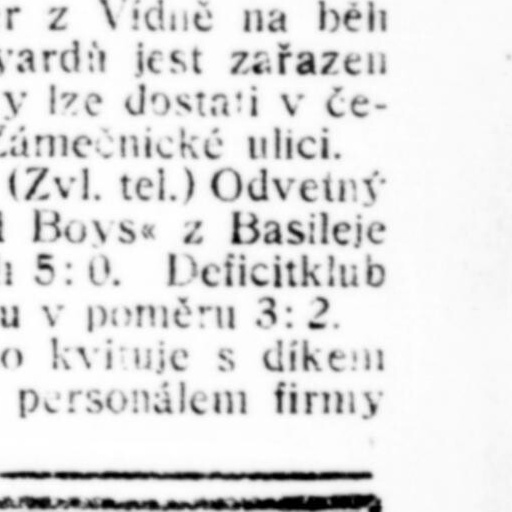

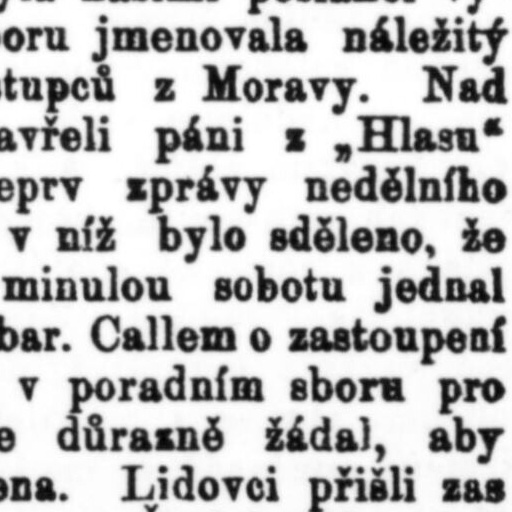

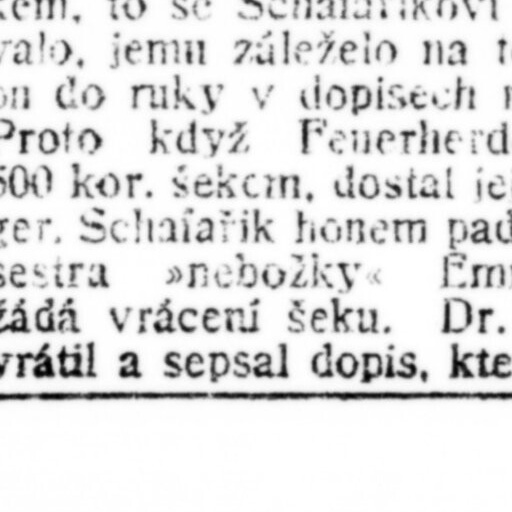

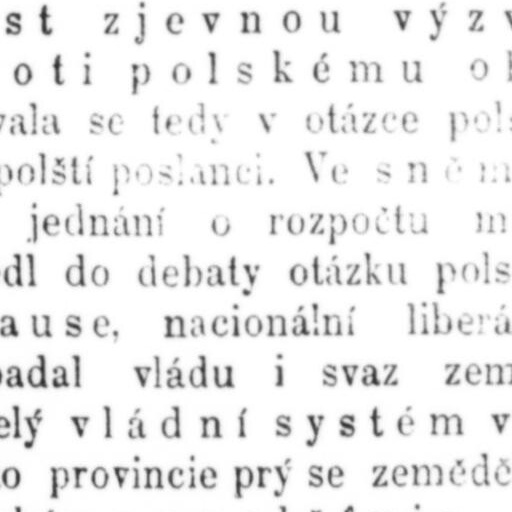

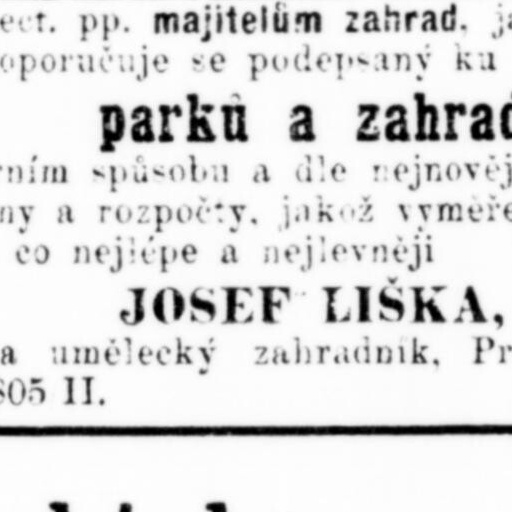

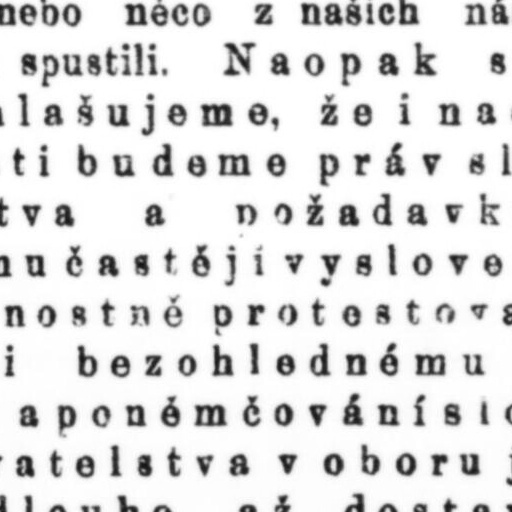

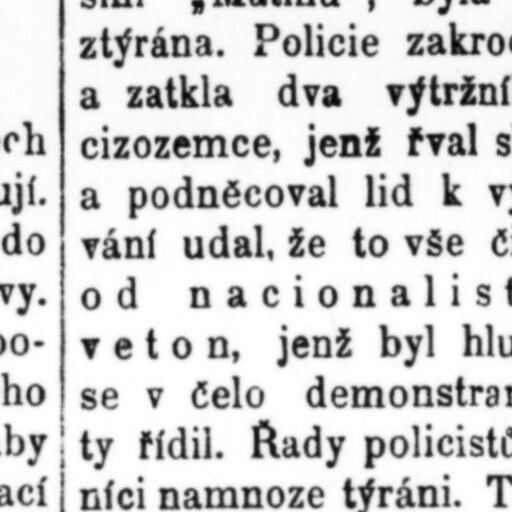

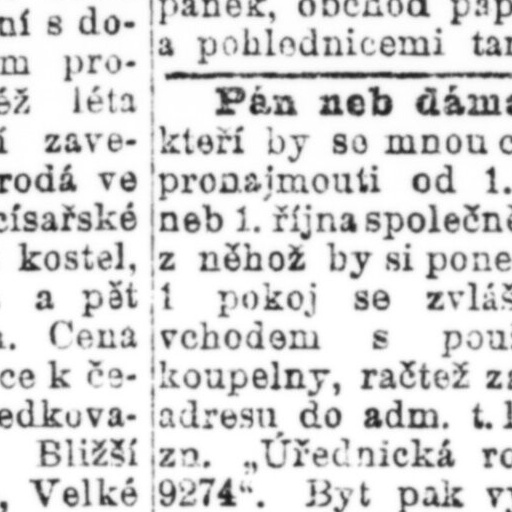

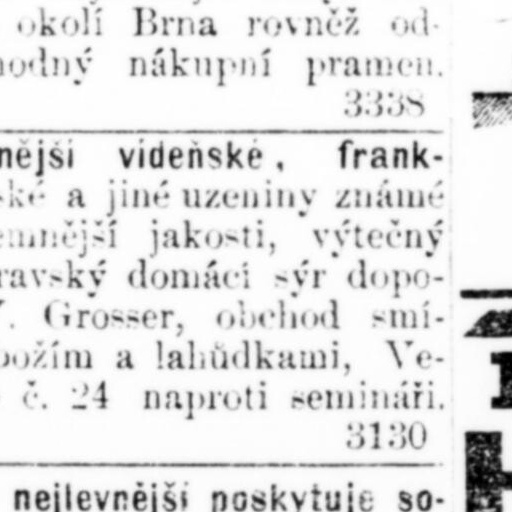

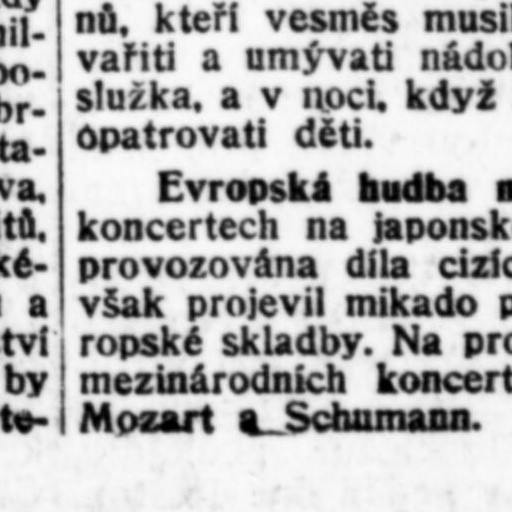

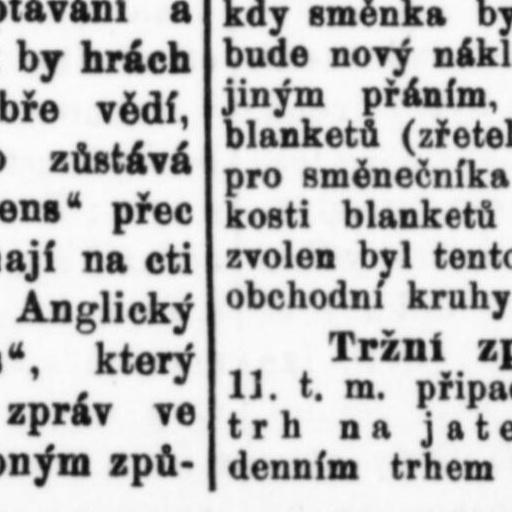

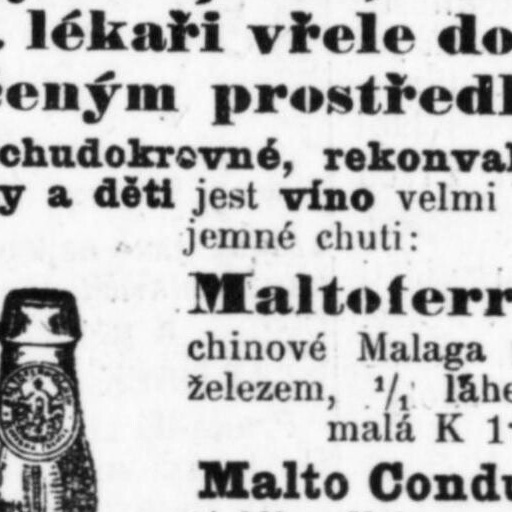

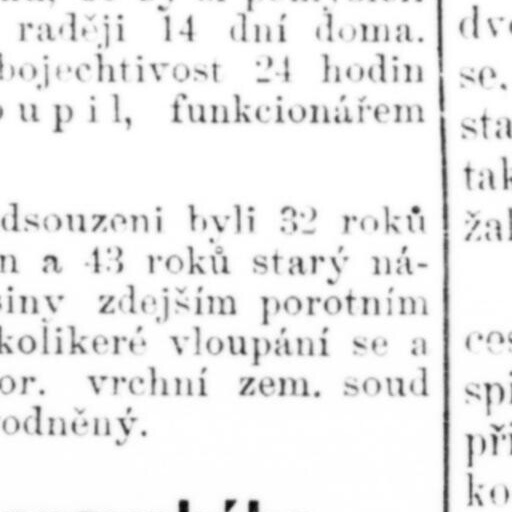

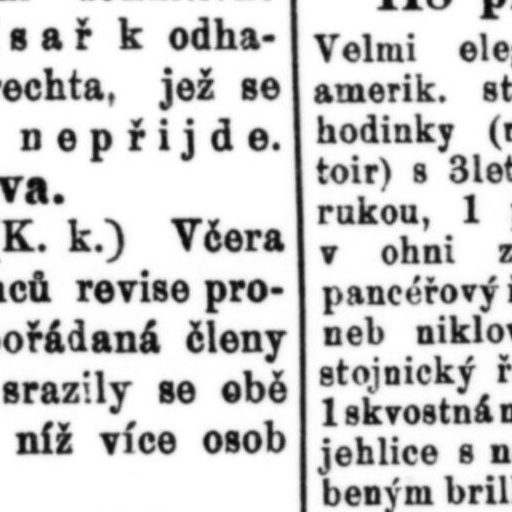

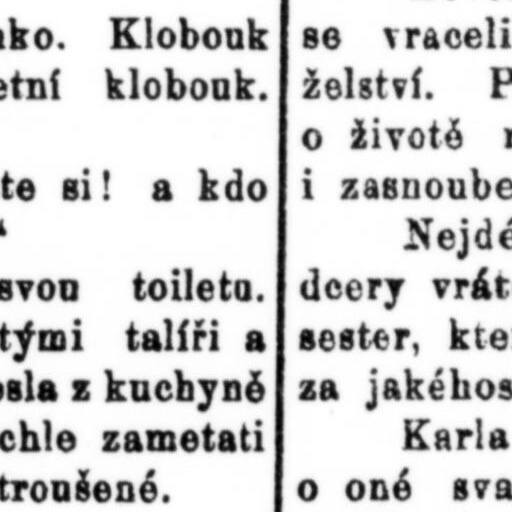

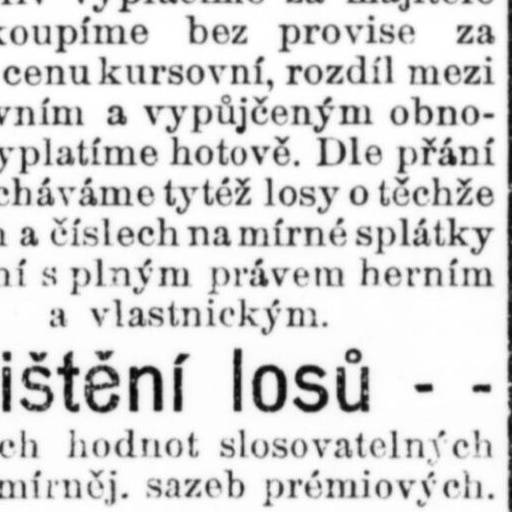

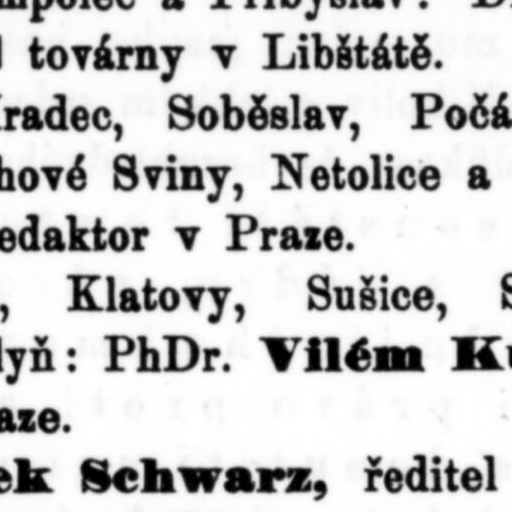

In [7]:
from IPython.display import Image


for i, item in enumerate(hundred):
    display(Image(filename='./app/static/crops/' + str(item) + '.jpg')) 
